In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.colors as mcolors
import healpy as hp
import math
from shapely.geometry import Point, Polygon

/tmp/ipykernel_1147188/2865716809.py:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(new_x, new_y, new_z, c=np.random.rand(3,), s=1)


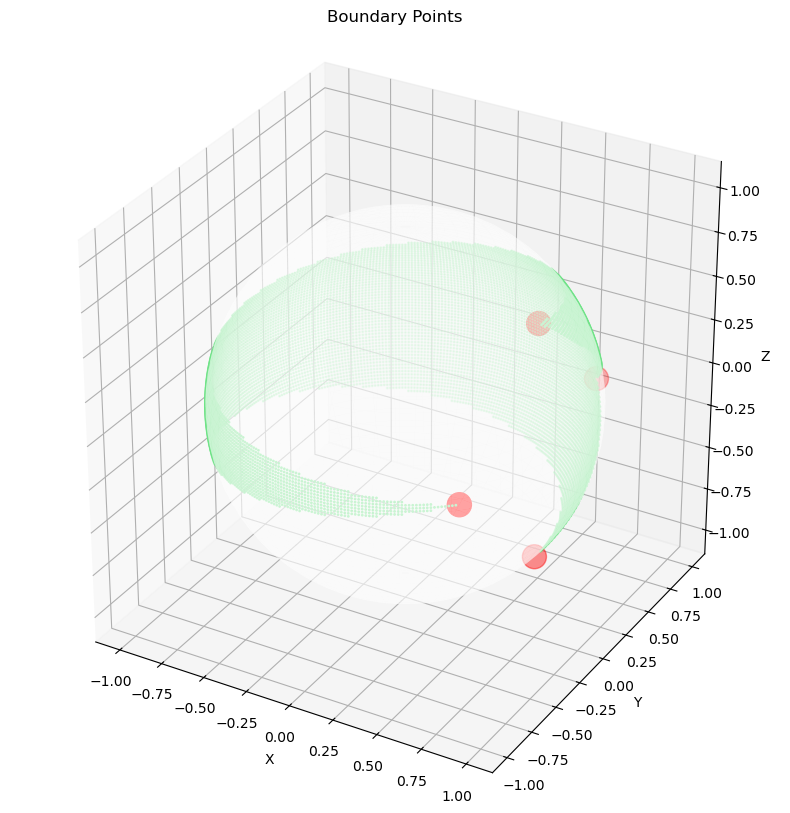

In [81]:
def main(order, index):
    i =index
    # Create points for sphere
    theta = np.linspace(0, 2 * np.pi, 100)
    phi = np.linspace(0, np.pi, 50)
    theta, phi = np.meshgrid(theta, phi)
    r = 1
    # Convert to Cartesian coordinates
    x = r * np.sin(phi) * np.cos(theta)
    y = r * np.sin(phi) * np.sin(theta)
    z = r * np.cos(phi)
    
    # Plot sphere
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, cmap = mcolors.ListedColormap(['white']), alpha=0.4)
    
    
    x_coor, y_coor, z_coor = getBoundaries(order, i)
    ax.scatter(x_coor, y_coor, z_coor, c='red', s=300)
    
    #for i in range(hp.order2npix(order)):
    new_x, new_y, new_z = getPoints(order, i)
    ax.scatter(new_x, new_y, new_z, c=np.random.rand(3,), s=1)
        
        
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Boundary Points')
    ax.set_box_aspect((1, 1, 1))
    plt.show()

main(0,4)

In [47]:
def getBoundaries(order, i):
    x_coor = []
    y_coor = []
    z_coor = []
    #for i in range(hp.order2npix(order)):
    test = hp.boundaries(hp.order2nside(order), i, step=1)
    x_coor.extend(test[0])
    y_coor.extend(test[1])
    z_coor.extend(test[2])
    
    return x_coor, y_coor, z_coor

In [90]:
def getPoints(order, i):
    x_coor = []
    y_coor = []
    z_coor = []

    test = hp.boundaries(hp.order2nside(order), i, step=1)
    x_coor.extend(test[0])
    y_coor.extend(test[1])
    z_coor.extend(test[2])
    thetas = []
    phis = []
    for i in range(4):
        # th, ph = cartesian_to_spherical(test[0][i], test[1][i], test[2][i])
        #     # Calculate theta (azimuthal angle)
        theta = math.atan2(test[1][i], test[0][i])
        phi = math.acos(test[2][i])

        thetas.append(math.degrees(theta))
        phis.append(math.degrees(phi))
     
    #create a polygon out of the boundaries    
    both = np.vstack((thetas, phis))
    polygon = Polygon(both.T)
    x, y = polygon.exterior.xy
    points = []
    
    #Find all the points inside the polygon
    for i in range (int(np.min(x)),int(np.max(x)), 1 ):
        for j in range(int(np.min(y)), int(np.max(y)), 1):
            if(polygon.contains(Point(i, j))):
                points.append((i, j))
                
    #convert degrees to radians            
    rad_points = []
    for i in range(len(points)):
        rad_points.append((math.radians(points[i][0]), math.radians(points[i][1])))
    
    #convert theta and phi back into x, y, and z
    new_x = []
    new_y = []
    new_z = []
    for i in range(len(rad_points)):
        theta = rad_points[i][0]
        phi = rad_points[i][1]
        new_x.append(math.sin(phi) * math.cos(theta))
        new_y.append(math.sin(phi) * math.sin(theta))
        new_z.append( math.cos(phi))
                
                    
    return new_x, new_y, new_z
    

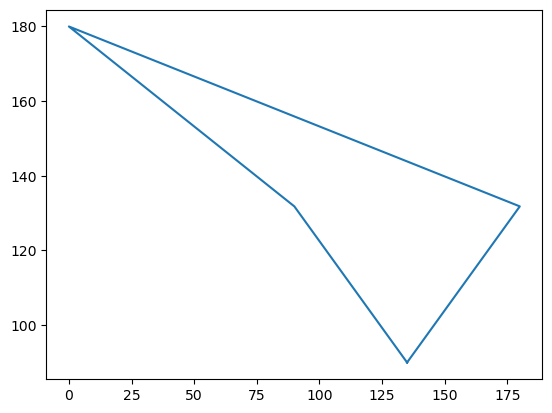

In [134]:
test = hp.boundaries(hp.order2nside(0), 9, step=1)
x_coor = []
y_coor = []
z_coor = []
x_coor.extend(test[0])
y_coor.extend(test[1])
z_coor.extend(test[2])
thetas = []
phis = []
for i in range(4):
    # th, ph = cartesian_to_spherical(test[0][i], test[1][i], test[2][i])
    #     # Calculate theta (azimuthal angle)
    theta = math.atan2(test[1][i], test[0][i])
    # if(theta < 0):
    #     theta = theta +2 *math.pi 
    phi = math.acos(test[2][i])

    thetas.append(math.degrees(theta))
    phis.append(math.degrees(phi))
    
#create a polygon out of the boundaries    
both = np.vstack((thetas, phis))
polygon = Polygon(both.T)
x, y = polygon.exterior.xy
    # Plot the polygon
plt.plot(x, y)
plt.show()


In [135]:
both

array([[135.       ,  90.       ,   0.       , 180.       ],
       [ 90.       , 131.8103149, 180.       , 131.8103149]])

In [125]:
x_coor

[-0.7453559924999299,
 -0.7071067811865475,
 -0.7453559924999299,
 -0.7071067811865477]

/tmp/ipykernel_1147188/2865716809.py:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(new_x, new_y, new_z, c=np.random.rand(3,), s=1)


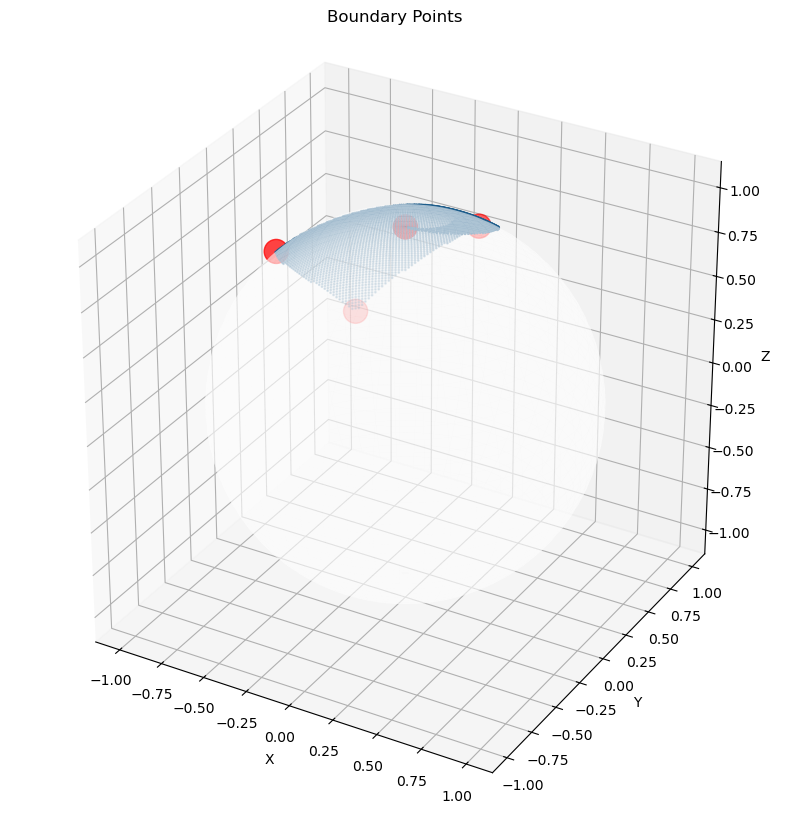

In [136]:
main(0, 1)